# TDA Lab 2: Simplicial complexes

TDA consists of various tools to extract the topological features from unstructured data (i.e., a finite set in a metric space). This topological information is a family of features (stored as persistence diagrams or barcodes) of the dataset and can be used for different tasks in data science, such as visualization and classifications. In many applications, they were used as complimentary features to design machine learning models.

The common theme in TDA is the following:

Dataset $\to$ Filtered Simplicial Complex $\to$ Persistence Module $\to$ Persistence Diagram or barcode.

In this lab, we learn how to construct a simplicial complex from a metric space (dataset). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Example 1:

In TDA, data is assumed to be a finite set in a metric space (usually an $n$-dimensional point cloud) and we usually reprsent it as a distance matrix (a matrix with entries that are the pairwise distances of points in the point cloud). We start with a very simple 3D point cloud. 

# Creating a distance matrix

In [2]:
# DATA: We define two functions. First compute the norm 2 distance and the second computes the parwise distances between points

import numpy as np

def euclidean_distance(p1, p2):
    """Computes |.|_2 distance between two points in some R^m."""
    return np.sqrt(np.sum((p1 - p2)**2))

def distance_matrix(points):
    """Computes the distance matrix for a set of points using the euclidean_distance metric."""
    n = len(points)
    distance_matrix = np.zeros((n, n)) #initiate an n by n matrix
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = euclidean_distance( points[i], points[j])
    return distance_matrix


In [3]:
# Example: X is a list of vectors in 3D space

X = np.array([[1,0,0], [0,1,0], [0,0,1], [0,0,0], [1/3,1/3,1/3]])


D = np.array(distance_matrix(X))

print(D)


[[0.         1.41421356 1.41421356 1.         0.81649658]
 [1.41421356 0.         1.41421356 1.         0.81649658]
 [1.41421356 1.41421356 0.         1.         0.81649658]
 [1.         1.         1.         0.         0.57735027]
 [0.81649658 0.81649658 0.81649658 0.57735027 0.        ]]


We can also represent this matrix in an interesting way:

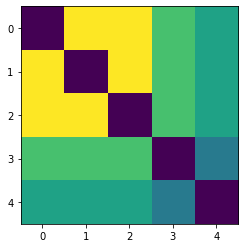

In [4]:
plt.imshow(D)
plt.show()

## Creating a  Simplicial Complex


Let $(X,d)$ be a metric space. For each $r \geq 0$, define a simplicial complex $X_r = (V_r, \Sigma_r)$, where for any $r$ the vertex set $V_r$ is $X$ and a subset $S\subset V_r$ is a simplex if   

$$ \forall x,y\in S \qquad d(x,y)\leq r
$$

Thus, the collecetion of $0$-simplices contains the elements of $X$ and the $1$-simplices form the set
$$
\{\{x_i,x_j\} \mid x_i,x_j \in X, d(x_i,x_j) \leq r\},
$$

Let's write a function to generate such a simplicial complex of dimention 2 for each $r \geq 0$. 

In [8]:
import numpy as np
from ripser import ripser

def VR_simplicial_complex(distance_matrix, r):
    """
    Computes the vertex set, edge set, and triangle set of a 2-dimensional Vietoris-Rips complex from a distance matrix.

    Parameters
    ----------
    distance_matrix : ndarray
        The pairwise distance matrix between points.
    r : float
        The parameter for constructing edges in the complex.

    Returns
    -------
    vertex_set : set
        A set containing the indices of the vertices in the complex.
    edge_set : set
        A set containing the indices of the edges in the complex, represented as pairs of vertices.
    triangle_set : set
        A set containing the indices of the triangles in the complex, represented as triples of vertices.
    """
    
    # Create empty sets for vertices, edges, and triangles
    n = distance_matrix.shape[0]
    vertex_set = set(range(n))
    edge_set = set()
    triangle_set = set()
    
    # Add edges and triangles to the complex
    for i in range(n):
        for j in range(i + 1, n):
            if distance_matrix[i, j] <= r:
                edge_set.add(frozenset([i, j]))
                for k in range(j + 1, n):
                    if (distance_matrix[i, k] <= r) and (distance_matrix[j, k] <= r):
                        triangle_set.add(frozenset([i, j, k]))

    return vertex_set, edge_set, triangle_set



Now we apply our funtion to the distance matrix that we constructed above

In [9]:
# Compute the 2 skeleton of Vietoris-Rips complex at different scales

for r in [0, 0.6, 1, 1.5]:

  
    print("The Vietoris-Rips complex at scale " +str(r)+":") 
    vertex_set, edge_set, triangle_set= VR_simplicial_complex(D, r)

#Print the vertex set, edge set, and triangle set (as a list of sets)
    print()
    print("Vertex set:", [{s} for s in vertex_set])
    print("Edge set:", [set(s) for s in edge_set])
    print("2-faces set:", [set(s) for s in triangle_set])
    print("***"*20)
    print()

The Vietoris-Rips complex at scale 0:

Vertex set: [{0}, {1}, {2}, {3}, {4}]
Edge set: []
2-faces set: []
************************************************************

The Vietoris-Rips complex at scale 0.6:

Vertex set: [{0}, {1}, {2}, {3}, {4}]
Edge set: [{3, 4}]
2-faces set: []
************************************************************

The Vietoris-Rips complex at scale 1:

Vertex set: [{0}, {1}, {2}, {3}, {4}]
Edge set: [{3, 4}, {1, 4}, {2, 3}, {0, 3}, {0, 4}, {2, 4}, {1, 3}]
2-faces set: [{0, 3, 4}, {2, 3, 4}, {1, 3, 4}]
************************************************************

The Vietoris-Rips complex at scale 1.5:

Vertex set: [{0}, {1}, {2}, {3}, {4}]
Edge set: [{3, 4}, {1, 4}, {2, 3}, {1, 2}, {0, 3}, {0, 1}, {0, 2}, {0, 4}, {2, 4}, {1, 3}]
2-faces set: [{0, 3, 4}, {0, 1, 4}, {2, 3, 4}, {0, 2, 3}, {1, 2, 4}, {0, 1, 2}, {0, 2, 4}, {1, 2, 3}, {0, 1, 3}, {1, 3, 4}]
************************************************************



# Visualizing simplicial complexes 1 (1-D simplicial Complexes)

Now we plot our complex (up to 2 faces cause we are limitted to 3D). The following function takes in a distance matrix and a non-negative number r and plots the underlying graph of a the corsponded Rips complex. 

In [10]:
#Plotting the underlying graph of a simplicial complex also known as 1-skeleton

import networkx as nx

def create_simplicial_complex(D,r):
    """
    Input: distance matrix and nonnegative radius
    Output: networkx graph 
    """
    
    G = nx.Graph()
    G.add_nodes_from(list(range(len(D))))
    edge_list = np.argwhere(D <= r) 
    G.add_edges_from(edge_list)
    
    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

Lets try this function and plot the graph of our simplicial complex that we constructed above. We need matplotlib.pyplot to do so:



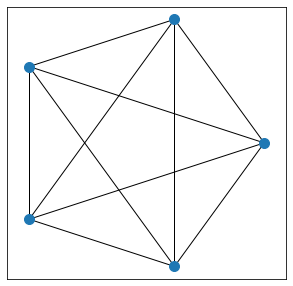

In [75]:
#Plot the 1-skeleton of the simplicial complex at some scales. 

import matplotlib.pyplot as plt

r = 2
G = create_simplicial_complex(D,r)


plt.figure(figsize = (5,5))
nx.draw_networkx(G, pos= nx.circular_layout(G), with_labels = False, node_size = 100)# you can play with pose to get different representations
        
plt.axis('equal')
plt.show()

Lets vary the parameter r and compare the plots:

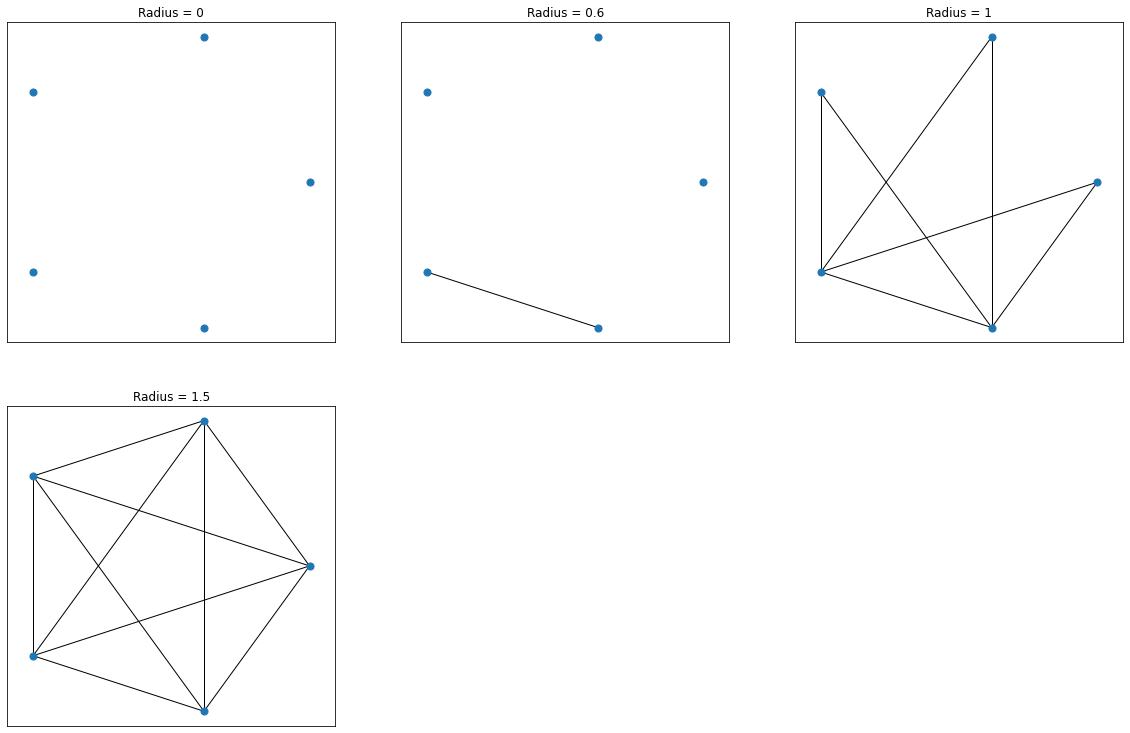

In [76]:
#plot a filtered Rips Complex

rs=[0, 0.6, 1, 1.5] # list of parameters

plt.figure(figsize = (20,20))

for (j,r) in enumerate(rs):
    G = create_simplicial_complex(D,r)
    plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos= nx.circular_layout(G), with_labels = False,node_size = 50)
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()

# Plotting 2D-Simplicial Complex

Lets move on to the higher dimension. To do so we will creat a list of 2-faces and add them one-by one to our graph. The function in the next cell returns a list of 2-faces of a simplicial complex (compare it with what we did in cell 90). 

In [77]:
def create_2_dim_simplicial_complex(D,r):
    
    # Create 1-skeleton
    G = create_simplicial_complex(D,r)
    
    # Get a list of 2-simplices
    two_spx_list = []
    
    # Naive search for viable 2-simplices
    for edge in G.edges():
        for vertex in G.nodes():
            if vertex != edge[0] and vertex != edge[1] and D[edge[0],vertex] < r and D[edge[1],vertex] < r:
                two_spx_list.append([edge[0],edge[1],vertex])
                
    return G, two_spx_list

Lets apply the fuction to our distance matrix:

In [78]:
G, two_spx_list = create_2_dim_simplicial_complex(D,5)
two_spx_list

[[0, 1, 2],
 [0, 1, 3],
 [0, 1, 4],
 [0, 2, 1],
 [0, 2, 3],
 [0, 2, 4],
 [0, 3, 1],
 [0, 3, 2],
 [0, 3, 4],
 [0, 4, 1],
 [0, 4, 2],
 [0, 4, 3],
 [1, 2, 0],
 [1, 2, 3],
 [1, 2, 4],
 [1, 3, 0],
 [1, 3, 2],
 [1, 3, 4],
 [1, 4, 0],
 [1, 4, 2],
 [1, 4, 3],
 [2, 3, 0],
 [2, 3, 1],
 [2, 3, 4],
 [2, 4, 0],
 [2, 4, 1],
 [2, 4, 3],
 [3, 4, 0],
 [3, 4, 1],
 [3, 4, 2]]

To draw the simplices, we'll use the `Polygon` function imported above. We'll add the triangles one-by-one to a collection, then use plotting tools to display them.

In [79]:
patches = []
pos= nx.circular_layout(G)
for i,spx in enumerate(two_spx_list):
    position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
    polygon = Polygon(position_array, True)
    patches.append(polygon)

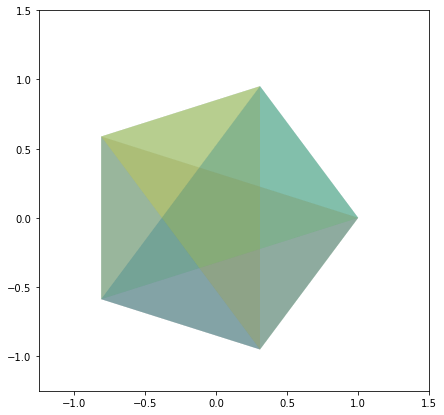

In [80]:
fig, ax = plt.subplots(figsize = (7,7))
#pos = {n:X[n,:] for n in range(len(X))}
colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.1)
p.set_array(np.array(colors))
ax.add_collection(p)

plt.xlim([-1.25, 1.5])
plt.ylim([-1.25, 1.5])
plt.show()

Now we'll plot the 1-skeleton first and overlay the triangles.

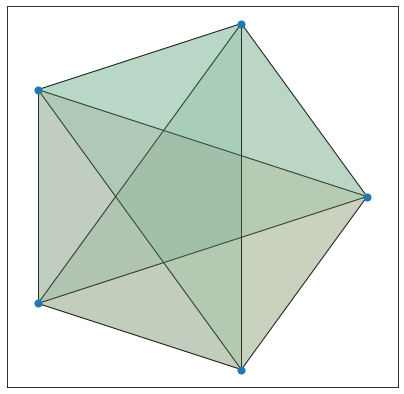

In [81]:
fig, ax = plt.subplots(figsize = (7,7))
#pos= nx.circular_layout(G)
pos= nx.circular_layout(G)

nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.05)
p.set_array(np.array(colors))
ax.add_collection(p)

plt.axis('equal')
plt.show()

Looks good! Now let's run it on a range of radii.

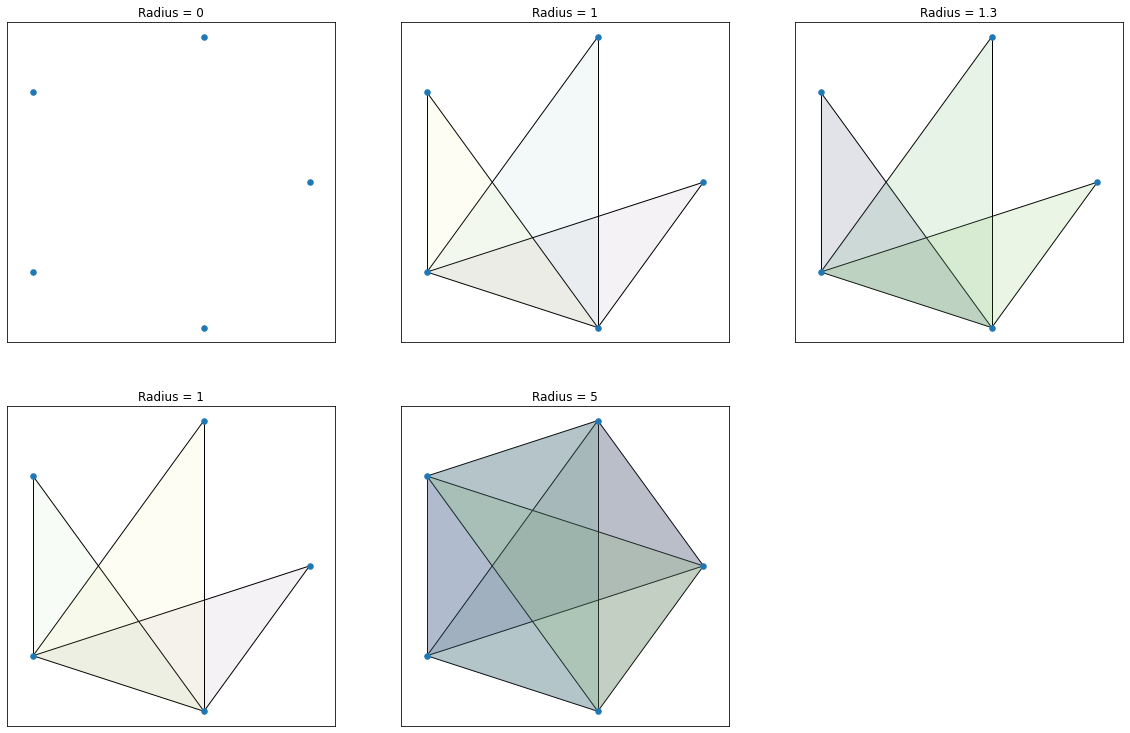

In [82]:
rs = [0,1,1.3,1,5]
pos= nx.circular_layout(G)

plt.figure(figsize = (20,20))

for (j,r) in enumerate(rs):
    G, two_spx_list = create_2_dim_simplicial_complex(D,r)
    patches = []

    for i,spx in enumerate(two_spx_list):
        position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
        polygon = Polygon(position_array, True)
        patches.append(polygon)
        
    ax = plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 30)
    colors = 100*np.random.rand(len(patches))
    p = PatchCollection(patches, alpha=0.05)
    p.set_array(np.array(colors))
    ax.add_collection(p)
    
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()

Note that each vertex is a 3D point and in $xyz$- plane they dont form a pentagon; we plot the underlying graph in 2D plane and added 2-faces to it. Lets see them in 3D 

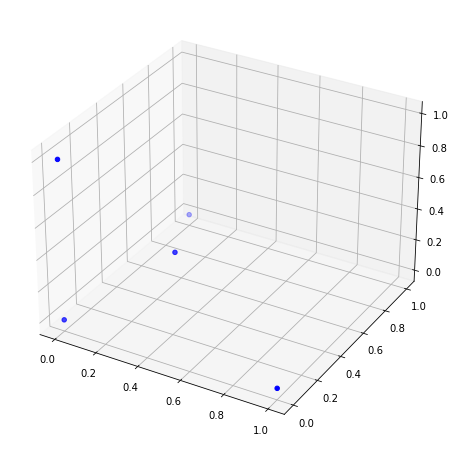

In [83]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca(projection='3d', adjustable='box')
ax.scatter(X[:,0],X[:,1],X[:,2], c='b', marker='o');

# Now your turn:
    
You get to work with a more complicated example!

# Example 2:

Consider the following noisy circle in $\mathbb{R}^2$. 



(1)Print the Vietoris-Rips complexes at $r=0, r= 0.1, r=0.3$.

(2) Plot the 1-skeleta of the Vietoris-Rips complexes for $r\in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.9,1]$.

(3) Plot the 2-skeleta of the Vietoris-Rips complexes for $r\in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.9,1]$.

(4) Plot the 1-skeleton first and overlay the triangles for $r\in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.9,1]$.


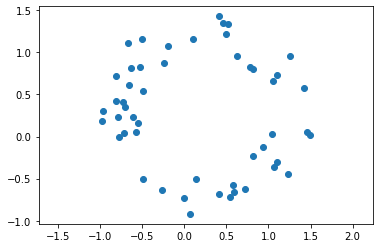

In [11]:
# creating a noisy circle

num_points = 50
mean=[0,0]
cov= np.array([[1,0],[0,1]]) # diagonal covariance

X = np.random.multivariate_normal(mean, cov, size = num_points) #Draw random samples from a multivariate normal distribution.

X = X.T/np.linalg.norm(X,axis = 1) # Normalizing X 

X = X.T + 0.5*np.random.rand(num_points,2)

plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
plt.show()

We can use the distance_matrix function above to compute the pairwise disnaces between points. 

[[0.         1.67804711 0.12733996 ... 1.60039509 0.34414955 1.57600379]
 [1.67804711 0.         1.5884147  ... 1.87790433 1.33779116 0.65346334]
 [0.12733996 1.5884147  0.         ... 1.48714948 0.28277447 1.5298752 ]
 ...
 [1.60039509 1.87790433 1.48714948 ... 0.         1.56271035 2.29914476]
 [0.34414955 1.33779116 0.28277447 ... 1.56271035 0.         1.24715627]
 [1.57600379 0.65346334 1.5298752  ... 2.29914476 1.24715627 0.        ]]


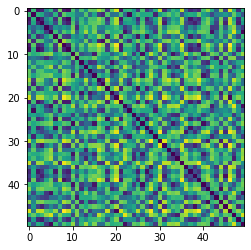

In [12]:
D=distance_matrix(X)

print(D)
plt.imshow(D)
plt.show()

We can also use 'pairwise_distances' to do so. For that, we need 'sklearn.metrics'

[[0.         0.84779679 1.45158103 ... 0.20141497 1.49075559 0.24189773]
 [0.84779679 0.         0.92262191 ... 0.69696448 0.73162181 0.93219412]
 [1.45158103 0.92262191 0.         ... 1.4074209  0.48181558 1.64322683]
 ...
 [0.20141497 0.69696448 1.4074209  ... 0.         1.38396253 0.24429749]
 [1.49075559 0.73162181 0.48181558 ... 1.38396253 0.         1.62788244]
 [0.24189773 0.93219412 1.64322683 ... 0.24429749 1.62788244 0.        ]]


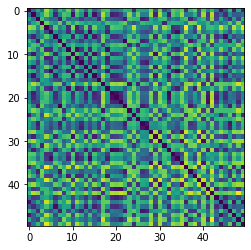

In [89]:
# creating the distance matrix of X:

from sklearn.metrics import pairwise_distances

D = pairwise_distances(X)
print(D)

plt.imshow(D)

plt.show()

In [90]:
# (1) Print the Vietoris-Rips complexes at  𝑟=0,𝑟=0.1,𝑟=0.3.


In [ ]:
#(2) Plot the 1-skeleta of the Vietoris-Rips complexes for  𝑟∈[0,0.1,0.2,0.3,0.4,0.5,0.6,0.9,1]

In [ ]:
#(3) Plot the 2-skeleta of the Vietoris-Rips complexes for  𝑟∈[0,0.1,0.2,0.3,0.4,0.5,0.6,0.9,1]


# Exercise 2 

The edit distance is a way of quantifying how dissimilar two words are to one another by counting the minimum number of operations required to transform one string into the other.

You can install the function that computes the edit distance via pip:



In [125]:
pip install editdistance

Note: you may need to restart the kernel to use updated packages.


Lets see how we can compute the edit distance between two words:

In [91]:
import editdistance

x= editdistance.eval('Soheil', 'Aditya')

print('The edit distance between Soheil and Aditya is', x)

The edit distance between Soheil and Aditya is 6


Here is the list of names in our class. Compute the edit distance between all pairs of names and store in a matrix. Then create 

In [92]:
names = ['Soheil','Aditya', 'Tomas', 'Ethan', 'Sarah', 'Alex', 'Jared', 'Tianbo', 'Angel', 'Kathy', 'Emily', 'Rachel','Rishabh', 'Lara', 'Oliver', 'Daniel']

In [93]:
# Compute the distance between all pair of names and store the results in a matrix.


# Print and plot the matrix.


In [94]:
# Construct the Vietoris-Rips complexes at  𝑟=1,r= 2, 𝑟= 3 and print it.

In [95]:
#(2)Plot the 1-skeleta of the Vietoris-Rips complexes for  r in [0,1,2,3,4,5,6]

In [96]:
#(3) Plot the 2-skeleta of the Vietoris-Rips complexes for  r in [0,1,2,3,4,5,6]